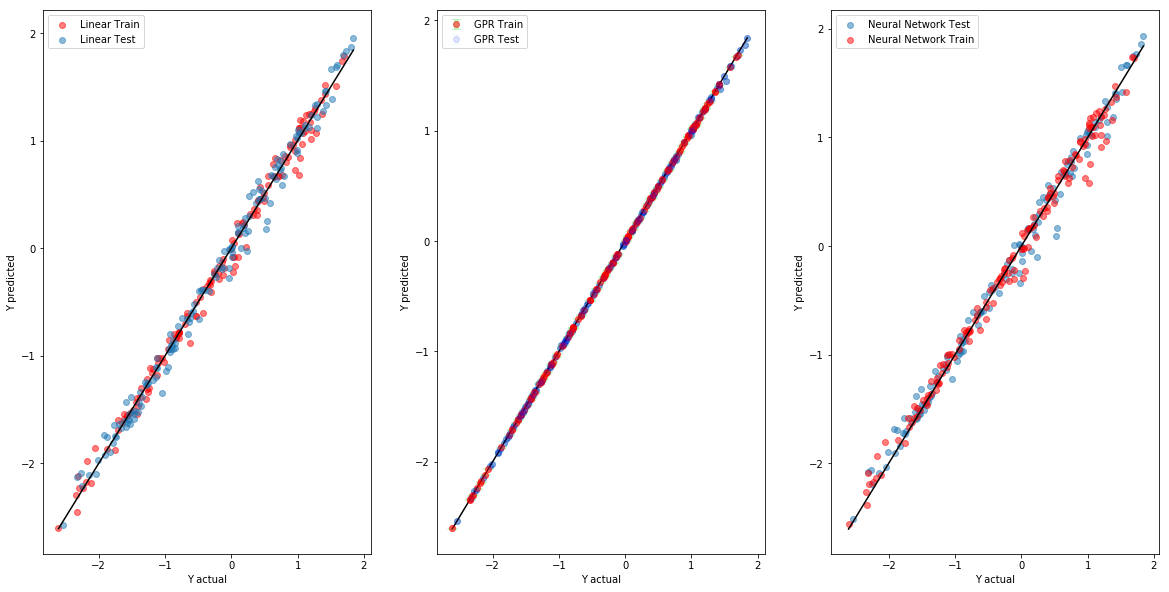

In [80]:
%matplotlib inline

#import modules and packages
import numpy as np

from numpy import genfromtxt
from matplotlib import pyplot as plt 
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
########################################################################################
#Main part of run

#setup jupyter inline parameters
plt.rcParams['figure.figsize'] = [20,10]

#initialize plot objects
fig, ax = plt.subplots(1,3)

#file tags
random_numbers = 1
insulators = 0

#set ratio of training to test ratio
test_ratio = .5

#read a given set of data
if random_numbers:
    file = '__SAMPLE_toy_data_X1X2X3X4.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(0,3))
    Y = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(7,8))
    
########################################################################################   
#partition training/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_ratio)

#initialize kernels
#Linear Regression
linear_model = LinearRegression().fit(X_train, Y_train)

#Gaussian Process Regression
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-12, 1e2)) + WhiteKernel()
gpr_model = GaussianProcessRegressor(kernel=kernel).fit(X_train, Y_train)

#Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(500,1000,500), activation='tanh', solver='adam', alpha=0.01, 
                        batch_size='auto', learning_rate='constant', learning_rate_init=0.00001, power_t=0.05, 
                        max_iter=500, shuffle=True, random_state=False, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.5, 
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08).fit(X_train, Y_train)
#make predictions
y_lin_test= linear_model.predict(X_test)
y_lin_train= linear_model.predict(X_train)
y_gpr_test,gpr_unc_test = gpr_model.predict(X_test,return_std=True)
y_gpr_train,gpr_unc_train = gpr_model.predict(X_train,return_std=True)
y_nn_test = nn_model.predict(X_test)
y_nn_train = nn_model.predict(X_train)
########################################################################################
#Plot the model predictions
#default for parity
x = np.linspace(min(Y),max(Y),len(Y))

#Linear model
ax[0].scatter(Y_train,y_lin_train,color='r',label='Linear Train',alpha=.5)
ax[0].scatter(Y_test,y_lin_test,label='Linear Test',alpha=.5)
ax[0].plot(x,x,'k')
ax[0].set_xlabel('Y actual')
ax[0].set_ylabel('Y predicted')
ax[0].legend(loc='upper left')

#Gaussian Process model
ax[1].scatter(Y_train,y_gpr_train,color='r',alpha=.25)
ax[1].errorbar(Y_train, y_gpr_train, yerr=gpr_unc_train, fmt='o', color='red',
             ecolor='lightgreen', elinewidth=5, capsize=5,label='GPR Train',alpha=.5)
ax[1].scatter(Y_test,y_gpr_test,alpha=.5)
ax[1].errorbar(Y_test, y_gpr_test, yerr=gpr_unc_test, fmt='o', color='blue',
             ecolor='lightblue', elinewidth=5, capsize=5,label='GPR Test',alpha=.1)
ax[1].plot(x,x,'k')
ax[1].set_xlabel('Y actual')
ax[1].set_ylabel('Y predicted')
ax[1].legend(loc='upper left')

#Neural Network model
ax[2].scatter(Y_test,y_nn_test,label='Neural Network Test',alpha=.5)
ax[2].scatter(Y_train,y_nn_train,color='r',alpha=.5,label='Neural Network Train')
ax[2].plot(x,x,'k')
ax[2].set_xlabel('Y actual')
ax[2].set_ylabel('Y predicted')
ax[2].legend(loc='upper left')

#show the plot
plt.show()
